In [1]:
import ROOT as rt
import numpy as np
import matplotlib.pyplot as plt

def getFEWZ_vals(FEWZ_histo):
    n_points = FEWZ_histo.GetNbinsX()
    x_vals = []
    y_vals = []
    for i in range(n_points):
        if i<0 or i >=42:
            continue
        if (FEWZ_histo.GetBinCenter(i)) < 110.0:
            x_vals.append(110.0)
            y_vals.append(FEWZ_histo.GetBinContent(i+1)*1.05) 
            continue
        if (FEWZ_histo.GetBinCenter(i)) >150:
            x_vals.append(150.0)
            y_vals.append(FEWZ_histo.GetBinContent(i)*0.95)  
            continue
        x_vals.append(FEWZ_histo.GetBinCenter(i))
        y_vals.append(FEWZ_histo.GetBinContent(i))
    return (np.array(x_vals), np.array(y_vals))

In [2]:
FEWZ_file = rt.TFile("../data//NNLO_Bourilkov_2017.root", "READ")
FEWZ_file.ls()

TFile**		../data//NNLO_Bourilkov_2017.root	
 TFile*		../data//NNLO_Bourilkov_2017.root	
  KEY: TH1D	full_xsec;1	full_xsec
  KEY: TH1D	full_36fb;1	full_36fb
  KEY: TH1D	full_shape;1	full_shape
  KEY: TH1D	cc_xsec;1	cc_xsec
  KEY: TH1D	cc_36fb;1	cc_36fb
  KEY: TH1D	cc_shape;1	cc_shape
  KEY: TH1D	ncnc_xsec;1	ncnc_xsec
  KEY: TH1D	ncnc_36fb;1	ncnc_36fb
  KEY: TH1D	ncnc_shape;1	ncnc_shape
  KEY: TH1D	one_jet_xsec;1	one_jet_xsec
  KEY: TH1D	one_jet_36fb;1	one_jet_36fb
  KEY: TH1D	one_jet_shape;1	one_jet_shape
  KEY: TH1D	two_jet_xsec;1	two_jet_xsec
  KEY: TH1D	two_jet_36fb;1	two_jet_36fb
  KEY: TH1D	two_jet_shape;1	two_jet_shape


In [3]:
FEWZ_histo_36fb = FEWZ_file.Get("full_36fb")
FEWZ_histo_36fb.Print("v")
FEWZ_histo_full_xsec = FEWZ_file.Get("full_xsec")
FEWZ_histo_full_xsec.Print("v")
FEWZ_histo_full_shape = FEWZ_file.Get("full_shape")
FEWZ_histo_full_shape.Print("v")

TH1.Print Name  = full_36fb, Entries= 50, Total sum= 476441
TH1.Print Name  = full_xsec, Entries= 50, Total sum= 13.2345
TH1.Print Name  = full_shape, Entries= 50, Total sum= 1


In [4]:
x_vals, y_vals = getFEWZ_vals(FEWZ_histo_full_shape)
print(x_vals)
print(y_vals)

[110.  110.5 111.5 112.5 113.5 114.5 115.5 116.5 117.5 118.5 119.5 120.5
 121.5 122.5 123.5 124.5 125.5 126.5 127.5 128.5 129.5 130.5 131.5 132.5
 133.5 134.5 135.5 136.5 137.5 138.5 139.5 140.5 141.5 142.5 143.5 144.5
 145.5 146.5 147.5 148.5 149.5 150. ]
[0.06888883 0.06560841 0.05985101 0.05407571 0.05001306 0.04578032
 0.0427122  0.03935657 0.03652706 0.03408782 0.03229583 0.02998172
 0.02769406 0.02642185 0.02475544 0.02336045 0.02238799 0.02100063
 0.02014974 0.01899276 0.01808521 0.01708502 0.01664578 0.01576014
 0.01485364 0.0141665  0.01393876 0.01325116 0.01268733 0.01220556
 0.0116554  0.01108455 0.01086104 0.01035282 0.00991412 0.00976164
 0.00960334 0.00908779 0.00881902 0.00833113 0.00803085 0.00780209]


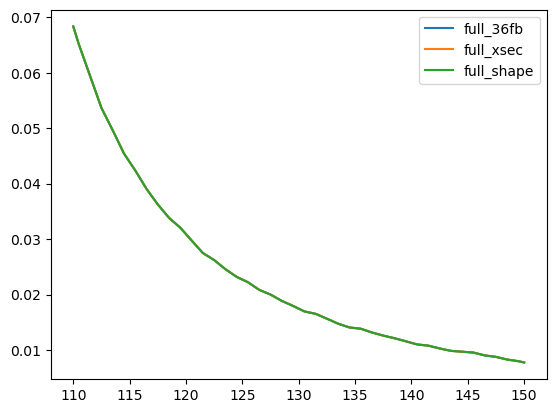

In [5]:
histo_l = [
    FEWZ_histo_36fb,
    FEWZ_histo_full_xsec,
    FEWZ_histo_full_shape,
]
for histo in histo_l:
    x_vals, y_vals = getFEWZ_vals(histo)
    y_vals = y_vals / np.sum(y_vals)
    plt.plot(x_vals, y_vals, label = histo.GetName())
plt.legend(loc="upper right")
plt.show()

In [31]:
# let's do a roospline on this
histo_l = [
    FEWZ_histo_36fb,
    FEWZ_histo_full_xsec,
    FEWZ_histo_full_shape,
]
name = "Canvas"
canvas = rt.TCanvas(name,name,800, 800)
x = rt.RooRealVar("x", "x", 110, 150)
frame = x.frame()
color_map = {
    "full_36fb" : rt.kBlue,
    "full_xsec" : rt.kGreen,
    "full_shape" : rt.kRed,
}
names = []

legend = rt.TLegend(0.65,0.55,0.9,0.7)


for histo in histo_l:
    x_vals, y_vals = getFEWZ_vals(histo)
    y_vals = y_vals / np.sum(y_vals)
    x_arr_vec = rt.vector("double")(x_vals)
    y_arr_vec = rt.vector("double")(y_vals)
    name = histo.GetName() + "spline"
    roo_spline = rt.RooSpline(name, name, x, x_arr_vec, y_arr_vec)
    name = histo.GetName() + "spline pdf"
    roo_spline_pdf = rt.RooWrapperPdf(name, name, roo_spline)
    roo_spline_pdf.plotOn(frame, rt.RooFit.LineColor(color_map[histo.GetName()]))
    # adding by name doesn't work for some reason, as TLegend has problem finding the object from frame
    legend.AddEntry(frame.getObject(int(frame.numItems())-1),name, "L") # this adds the latest object added to frame to legend
    # legend.AddEntry(frame.findObject(roo_spline_pdf.GetName()),name, "L") # this returns object not found

frame.Draw()

# legend.AddEntry(frame.getObject(int(frame.numItems())-1),name, "L")
# legend.AddEntry(roo_spline_pdf,name, "L")

names.append(name)

# for name in names:
#     legend.AddEntry(name,name, "L")

    



legend.Draw()
canvas.Update()
canvas.Draw()
canvas.SaveAs(f"./quick_plots/quickFEWZ_SplineTest.pdf")

[#1] INFO:NumericIntegration -- RooRealIntegral::init(full_36fbspline pdf_Int[x]) using numeric integrator RooIntegrator1D to calculate Int(x)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(full_xsecspline pdf_Int[x]) using numeric integrator RooIntegrator1D to calculate Int(x)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(full_shapespline pdf_Int[x]) using numeric integrator RooIntegrator1D to calculate Int(x)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas
Info in <TCanvas::Print>: pdf file ./quick_plots/quickFEWZ_SplineTest.pdf has been created


In [48]:
color_map = {
    "full_36fb" : rt.kBlue,
    "full_xsec" : rt.kGreen,
    "full_shape" : rt.kRed,
}

In [18]:
# Now we compare the core Roospline to the DY background 
import awkward as ak
import dask_awkward as dak
import numpy as np
import ROOT as rt

load_path = "/work/users/yun79/stage2_output/test/processed_events_dyMC.parquet"
processed_eventsSignalMC = ak.from_parquet(load_path)
name = "Canvas"
canvas = rt.TCanvas(name,name,800, 800) # giving a specific name for each canvas prevents segfault?
# canvas = rt.TCanvas(name,name,400, 800) # giving a specific name for each canvas prevents segfault?

canvas.cd()



# the mass range and nbins are taken from Fig 6.15 of the long AN (page 57)
mass_name = "DY_dimuon_mass"
massDyMC =  rt.RooRealVar(mass_name,mass_name,125,110,150) # h peak range
nbins = 42
massDyMC.setBins(nbins)
# clear canvas to plot the signal model
canvas.Clear()
legend = rt.TLegend(0.65,0.55,0.9,0.7)
frame = massDyMC.frame()

color_map = {
    0 : rt.kBlue,
    1 : rt.kGreen+2,
    2 : rt.kRed,
    3 : rt.kYellow,
    4 : rt.kBlack,
}
dyMC_names = []
# for cat_ix in range(1):
for cat_ix in [0,4]:
# cat_ix = 0
    subCat_filter = (processed_eventsSignalMC["subCategory_idx"] == cat_ix)
    subCat_mass_arrDyMC = processed_eventsSignalMC.dimuon_mass[subCat_filter]
    subCat_mass_arrDyMC  = ak.to_numpy(subCat_mass_arrDyMC) # convert to numpy for rt.RooDataSet
    
    roo_datasetDyMC = rt.RooDataSet.from_numpy({mass_name: subCat_mass_arrDyMC}, [massDyMC])
    roo_datasetDyMC.SetName(f"ggH PowHeg MC subCat {cat_ix}")
    roo_histDyMC = rt.RooDataHist("DyMC_hist",f"binned version of DyMC of subcat {cat_ix}", rt.RooArgSet(massDyMC), roo_datasetDyMC)  # copies binning from mass variable
    # normalize roo_histDyMC
    THist = roo_histDyMC.createHistogram(mass_name)
    # THist.Scale(1/roo_histSigMC.sumEntries()) # scale to make intgral equal to one
    THist.Scale(1/THist.Integral())
    roo_histDyMC_normalized = rt.RooDataHist(f"DyMC SubCat{cat_ix}",f"binned version of DyMC of subcat {cat_ix}", rt.RooArgSet(massDyMC), THist) # turn it back to RooDataHist for plotOn to work
    
    print(f"roo_histDyMC_normalized.sumEntries() : {roo_histDyMC_normalized.sumEntries()}")
    roo_histDyMC_normalized.plotOn(frame, DataError="SumW2", Name=roo_datasetDyMC.GetName(), MarkerColor=color_map[cat_ix], MarkerStyle=100)
    dyMC_names.append(roo_histDyMC_normalized.GetName())
    
    

# add in roospline
x_vals, y_vals = getFEWZ_vals(FEWZ_histo_36fb)
print(f"x_vals.shape: {x_vals.shape}")
y_vals = y_vals / np.sum(y_vals)
x_arr_vec = rt.vector("double")(x_vals)
y_arr_vec = rt.vector("double")(y_vals)
name = FEWZ_histo_36fb.GetName()
roo_spline = rt.RooSpline(name, name, massDyMC, x_arr_vec, y_arr_vec)


roo_spline.plotOn(frame, LineColor=rt.kGreen)


# legend
name = roo_spline.GetName()
legend.AddEntry(name, "RooSpline of FEWZ", "L")
for name in dyMC_names:
    legend.AddEntry(name, name, "P")

frame.Draw()
legend.Draw()

canvas.Update()
canvas.Draw()

canvas.SaveAs(f"./quick_plots/stage3_plot_dy_ggH{cat_ix}.pdf")

roo_histDyMC_normalized.sumEntries() : 1.0000000027939677
roo_histDyMC_normalized.sumEntries() : 1.0
x_vals.shape: (42,)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas
Warning in <TFile::Append>: Replacing existing TH1: DyMC_hist__DY_dimuon_mass (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: DyMC_hist__DY_dimuon_mass (Potential memory leak).
Info in <TCanvas::Print>: pdf file ./quick_plots/stage3_plot_dy_ggH4.pdf has been created


In [81]:
roo_histDyMC_normalized.Print("v")

DataStore DyMC_hist_normalized (binned version of DyMC of subcat 0)
  Contains 42 entries
  Observables: 
    1)  DY_dimuon_mass = 149.524  L(110 - 150) B(42)  "DY_dimuon_mass"
Binned Dataset DyMC_hist_normalized (binned version of DyMC of subcat 0)
  Contains 42 bins with a total weight of 1
  Observables:     1)  DY_dimuon_mass = 149.524  L(110 - 150) B(42)  "DY_dimuon_mass"


In [82]:
total_wgt = 0
for ix in range(42):
    wgt = roo_histDyMC_normalized.weight(ix)
    total_wgt += wgt
    binCentre = roo_histDyMC_normalized.get(ix)["DY_dimuon_mass"].getVal()
total_wgt

1.0000000027939677

In [73]:
roo_histDyMC_normalized.weight(48)
binCentre = roo_histDyMC_normalized.get(41)["DY_dimuon_mass"].getVal()

In [74]:
binCentre

149.52380952380952